Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.83      0.91         6

    accuracy                           0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7

Confusion Matrix:
 [[1 0]
 [1 5]]


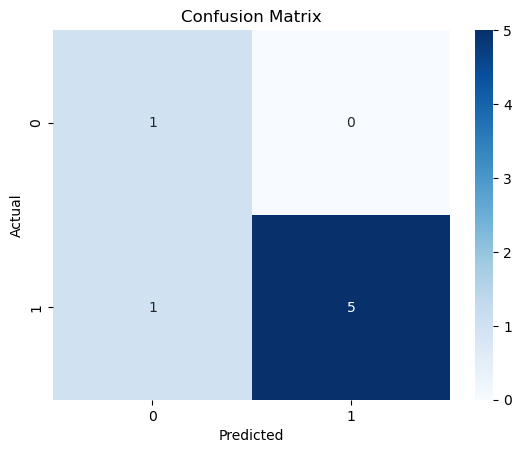

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 2: Load dataset
df = pd.read_csv("C:\\Users\\Sujit\\Downloads\\movies app\\indian-movie-theatres.csv")
df = df.dropna()

# Step 3: Create binary classification target
df['Target'] = (df['average_ticket_price'] > 120).astype(int)

# Step 4: Drop non-informative or highly correlated columns
df = df.drop(['theatre_name', 'notes', 'source_of_information', 'calculated_ticket_prices'], axis=1)

# Step 5: Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Step 6: Feature-target split
X = df.drop("Target", axis=1)
y = df["Target"]

# Step 7: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# Step 9: Train logistic regression with lower C to reduce overfitting
model = LogisticRegression(C=0.05, max_iter=100, solver="liblinear")
model.fit(X_train, y_train)

# Step 10: Predictions
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# Output
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=[0, 1]))

# Step 11: Visualization
sns.heatmap(confusion_matrix(y_test, y_pred, labels=[0, 1]), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
